In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

### Simulated Data

In [18]:
# create data
np.random.seed(42)
m = 50
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

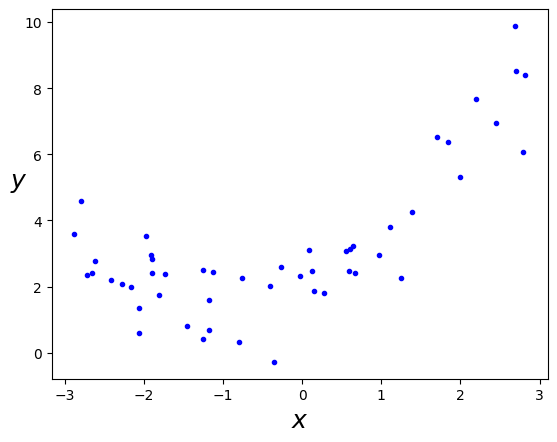

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.show()


In [24]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

X_poly[0:5] # x, x**2

array([[-0.75275929,  0.56664654],
       [ 2.70428584,  7.3131619 ],
       [ 1.39196365,  1.93756281],
       [ 0.59195091,  0.35040587],
       [-2.06388816,  4.25963433]])

In [19]:
X[0:2]

array([[-0.75275929],
       [ 2.70428584]])

In [22]:
def polynomial_fit(X,y, degree, X_test=None, y_test=None):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)
    lin_reg.intercept_, lin_reg.coef_

    # plot the data and the curve
    X_new = np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly_features.transform(X_new)
    y_new = lin_reg.predict(X_new_poly)
    if X_test is not None:
        plt.plot(X, y, "b.", label="Train Data")
        plt.plot(X_test, y_test, "g.", label="Test Data")
    else:
        plt.plot(X, y, "b.", label="Data")
    plt.plot(X_new, y_new, "r-", linewidth=2, label=f"Polynomial Degree {degree}")
    plt.xlabel("$x$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.legend(loc="upper left", fontsize=14)
    plt.axis([-3, 3, 0, 10])

    plt.show()

    y_pred = lin_reg.predict(X_poly)
    if X_test is not None:
        y_test_pred = lin_reg.predict(poly_features.transform(X_test))
        print('Train MAE:', round(mean_absolute_error(y, y_pred),2))
        print('Test MAE:', round(mean_absolute_error(y_test, y_test_pred),2))
    else:
        print('MAE:', round(mean_absolute_error(y, y_pred),2))
    print('Intercept: {:.3f}'.format(float(lin_reg.intercept_[0])))
    print('Coefficients: {}'.format(', '.join(['{:.3f}'.format(float(coef)) for coef in np.nditer(lin_reg.coef_)]))) 
    return X_poly


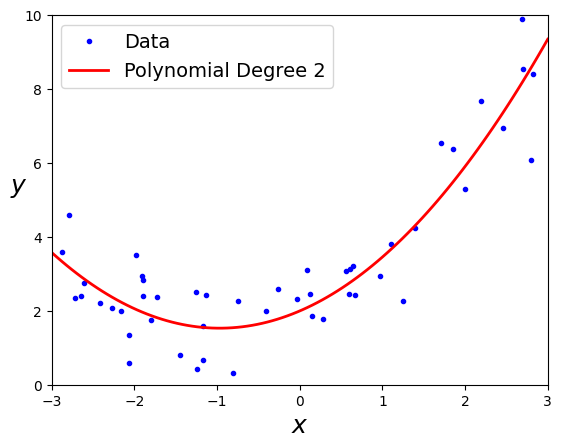

MAE: 0.73
Intercept: 1.996
Coefficients: 0.962, 0.496


In [23]:
X_poly = polynomial_fit(X=X, y=y, degree=2)

In [7]:
X[0:4]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091]])

In [8]:
X_poly[0:4]

array([[-0.75275929,  0.56664654],
       [ 2.70428584,  7.3131619 ],
       [ 1.39196365,  1.93756281],
       [ 0.59195091,  0.35040587]])

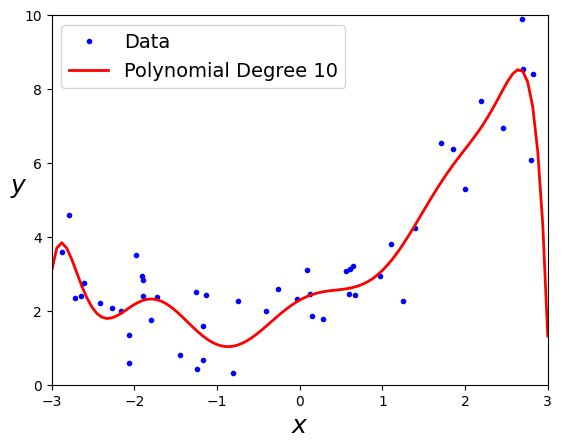

MAE: 0.68
Intercept: 2.291
Coefficients: 1.244, -1.669, -0.314, 2.054, 0.072, -0.672, 0.002, 0.091, -0.001, -0.004


In [9]:
x_ploy = polynomial_fit(X=X, y=y, degree=10)

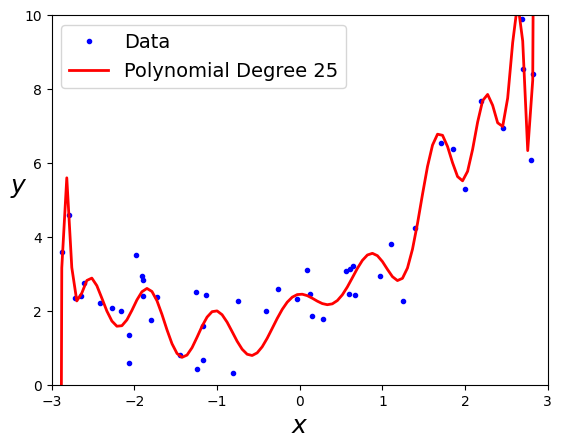

MAE: 0.47
Intercept: 2.451
Coefficients: 0.152, -7.595, 9.125, 20.215, -17.529, -6.584, 9.722, -25.975, 1.442, 35.560, -3.317, -21.492, 1.232, 7.521, -0.147, -1.647, -0.020, 0.229, 0.009, -0.020, -0.001, 0.001, 0.000, -0.000, -0.000


In [28]:
x_poly = polynomial_fit(X=X, y=y, degree=25)

[Taylor Theorem](https://en.wikipedia.org/wiki/Taylor%27s_theorem)

## Train-Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print('Number of training samples:', len(X_train))
print('Number of testing samples:', len(X_test))

Number of training samples: 40
Number of testing samples: 10


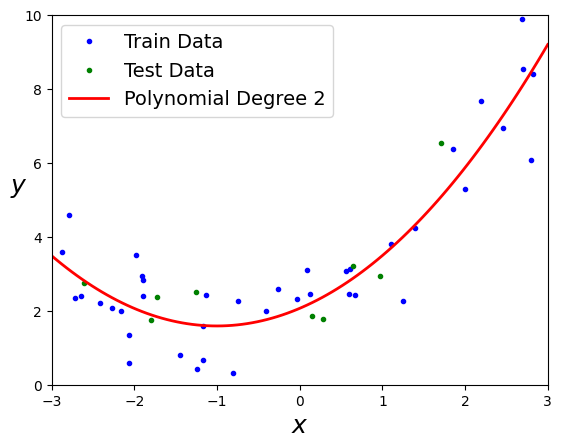

Train MAE: 0.73
Test MAE: 0.69
Intercept: 2.068
Coefficients: 0.953, 0.475


In [13]:
x_poly = polynomial_fit(X=X_train, y=y_train, degree=2, X_test=X_test, y_test=y_test)

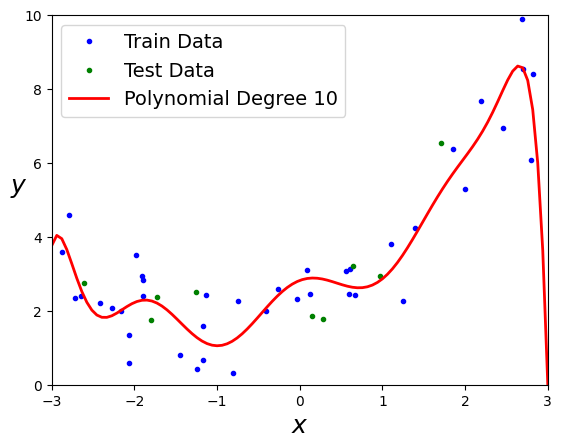

Train MAE: 0.65
Test MAE: 0.89
Intercept: 2.821
Coefficients: 0.843, -2.789, 0.160, 2.628, -0.131, -0.799, 0.037, 0.104, -0.003, -0.005


In [14]:
x_poly = polynomial_fit(X=X_train, y=y_train, degree=10, X_test=X_test, y_test=y_test)

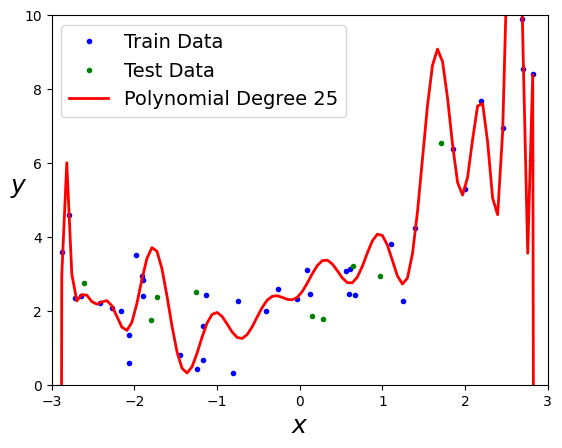

Train MAE: 0.31
Test MAE: 1.45
Intercept: 2.432
Coefficients: 2.606, 11.858, -15.009, -96.282, 50.474, 272.455, -74.791, -378.210, 54.028, 299.349, -17.766, -146.535, 0.147, 46.389, 1.965, -9.672, -0.735, 1.319, 0.136, -0.113, -0.014, 0.006, 0.001, -0.000, -0.000


In [15]:
x_poly = polynomial_fit(X=X_train, y=y_train, degree=25, X_test=X_test, y_test=y_test)